<a href="https://colab.research.google.com/github/RogerHeederer/ML_practice_MyFirstML_B/blob/master/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source reference : https://github.com/wikibook/machine-learnin

**위 레퍼런스를 참조하여 공부하였으며, 필요하다고 생각되는 부분에 추가적인 설명 ,코드 추가, 그림 삽입 등을 덧붙였습니다..**


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.random.set_seed(1)
np.random.seed(1)

from IPython.display import Image

##Word2Vec##
- 비슷한 의미의 단어는 벡터 공간에서 가깝게 위치함
- 비지도 학습. Label이 자동 생성되는 장점 

In [3]:
#데이터 획득
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [4]:
#불용어 제거 = Delete stop words

def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [5]:
corpus = remove_stop_words(corpus)

In [6]:
for text in corpus:
  print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [7]:
words = []
for text in corpus:
  for word in text.split(' '):
    words.append(word)

In [8]:
words

['king',
 'strong',
 'man',
 'queen',
 'wise',
 'woman',
 'boy',
 'young',
 'man',
 'girl',
 'young',
 'woman',
 'prince',
 'young',
 'king',
 'princess',
 'young',
 'queen',
 'man',
 'strong',
 'woman',
 'pretty',
 'prince',
 'boy',
 'king',
 'princess',
 'girl',
 'queen']

In [9]:
words = set(words) #중복 단어 제거

In [10]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

**단어별로 인덱스 매핑 만들기**

In [11]:
word2int = {}

for i, word in enumerate(words):
  word2int[word] = i

In [12]:
word2int

{'boy': 8,
 'girl': 11,
 'king': 0,
 'man': 2,
 'pretty': 9,
 'prince': 10,
 'princess': 1,
 'queen': 5,
 'strong': 7,
 'wise': 6,
 'woman': 4,
 'young': 3}

In [13]:
#skip gram 방식으로 단어별 레이블 생성
sentences = []
for sentence in corpus:
  sentences.append(sentence.split())

sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [34]:
for sentence in sentences:
  print("sentence length: ", len(sentence))
  for idx, word in enumerate(sentence):
    print(idx, word)
    

sentence length:  3
0 king
1 strong
2 man
sentence length:  3
0 queen
1 wise
2 woman
sentence length:  3
0 boy
1 young
2 man
sentence length:  3
0 girl
1 young
2 woman
sentence length:  3
0 prince
1 young
2 king
sentence length:  3
0 princess
1 young
2 queen
sentence length:  2
0 man
1 strong
sentence length:  2
0 woman
1 pretty
sentence length:  3
0 prince
1 boy
2 king
sentence length:  3
0 princess
1 girl
2 queen


In [14]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[ 
                max(idx - WINDOW_SIZE, 0) : #idx = 0~ 2사이
                min(idx + WINDOW_SIZE, len(sentence)) + 1] : #len(sentence) = 3 
            if neighbor != word:
                data.append([word, neighbor])

In [35]:
df = pd.DataFrame(data, columns = ['input', 'label'])
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [16]:
ONE_HOT_DIM = len(words)

In [17]:
def to_one_hot_encoding(data_point_index):
  one_hot_encoding = np.zeros(ONE_HOT_DIM)
  one_hot_encoding[data_point_index] = 1
  return one_hot_encoding  

In [59]:
X = []
Y = []

for x, y in zip(df['input'], df['label']):
  print(x, y)
  print(word2int[x], word2int[y])
  X.append(to_one_hot_encoding(word2int[ x ]))
  Y.append(to_one_hot_encoding(word2int[ y ]))

king strong
0 7
king man
0 2
strong king
7 0
strong man
7 2
man king
2 0
man strong
2 7
queen wise
5 6
queen woman
5 4
wise queen
6 5
wise woman
6 4
woman queen
4 5
woman wise
4 6
boy young
8 3
boy man
8 2
young boy
3 8
young man
3 2
man boy
2 8
man young
2 3
girl young
11 3
girl woman
11 4
young girl
3 11
young woman
3 4
woman girl
4 11
woman young
4 3
prince young
10 3
prince king
10 0
young prince
3 10
young king
3 0
king prince
0 10
king young
0 3
princess young
1 3
princess queen
1 5
young princess
3 1
young queen
3 5
queen princess
5 1
queen young
5 3
man strong
2 7
strong man
7 2
woman pretty
4 9
pretty woman
9 4
prince boy
10 8
prince king
10 0
boy prince
8 10
boy king
8 0
king prince
0 10
king boy
0 8
princess girl
1 11
princess queen
1 5
girl princess
11 1
girl queen
11 5
queen princess
5 1
queen girl
5 11


In [66]:
X[0:2]# king, king

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [68]:
Y[0:2]# strong, man

[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [20]:
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [21]:
X_train

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.,

In [22]:
ONE_HOT_DIM

12

In [36]:
# 시각화를 위해 2차원으로 인코딩합니다.
encoding_dim = 2

# 입력값은 원 핫 인코딩입니다. 단어의 갯수만큼의 차원인 벡터입니다.
input_word = Input(shape=(ONE_HOT_DIM,))
# 가중치를 그대로 word2vec으로 사용하기 위해 편향값을 주지 않습니다.
encoded = Dense(encoding_dim, use_bias=False)(input_word)
# 디코더는 전달된 값을 원 핫 인코딩으로 전환합니다.
decoded = Dense(ONE_HOT_DIM, activation='softmax')(encoded)

# this model maps an input to its reconstruction
w2v_model = Model(input_word, decoded)

In [38]:

w2v_model.compile(optimizer='adam', loss='categorical_crossentropy')

In [39]:
w2v_model.fit(X_train, Y_train,
                epochs=1000,
                shuffle=True, verbose=0)

In [40]:
w2v_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                36        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [47]:
w2v_model.layers[1].get_weights()

[array([[-1.3239999 , -0.3605242 ],
        [ 0.8802525 ,  0.71858585],
        [-0.3573395 , -0.8664189 ],
        [-0.11806741,  0.02356684],
        [ 0.46581763,  0.8301304 ],
        [ 1.5548221 ,  0.46402952],
        [ 1.5144501 ,  1.6264374 ],
        [-0.8439687 , -2.299894  ],
        [-0.46706927, -1.1833842 ],
        [ 1.8793051 ,  1.8287808 ],
        [ 1.2753644 , -1.9178241 ],
        [ 0.87851715,  0.60015315]], dtype=float32)]

In [50]:
w2v_model.layers[2].get_weights() # 단어 1개당 one_hot_dim = 12 / 문장 1개당 단어는 3개

[array([[ 0.1576258 ,  0.7762416 , -1.0666156 ,  0.5427238 ,  0.97700083,
          0.5162024 ,  0.76077175, -1.0518162 , -0.19811301,  0.07610439,
         -1.400596  ,  0.6565472 ],
        [-1.2016414 ,  0.8672147 , -1.1155746 , -0.1298119 ,  1.4314219 ,
          1.57801   ,  1.1538208 , -0.31785393, -0.7094113 ,  1.3871182 ,
         -0.07813247,  1.1432887 ]], dtype=float32),
 array([ 0.12043077,  0.07711692, -0.2835341 ,  0.95821583, -0.09699578,
         0.29031423, -0.65080255, -0.1885484 ,  0.1046576 , -0.89388657,
        -0.04550865, -0.02913976], dtype=float32)]

In [51]:
# 히든 레이어의 가중치 = word2vec / 인풋값이 one hot encoding이라 1과 곱한 가중치만 살아남기 때문

vectors = w2v_model.layers[1].weights[0].numpy().tolist()

In [54]:
vectors

[[-1.3239998817443848, -0.3605242073535919],
 [0.880252480506897, 0.7185858488082886],
 [-0.3573395013809204, -0.8664188981056213],
 [-0.11806740611791611, 0.02356683649122715],
 [0.4658176302909851, 0.830130398273468],
 [1.5548220872879028, 0.4640295207500458],
 [1.5144500732421875, 1.6264374256134033],
 [-0.8439686894416809, -2.299894094467163],
 [-0.46706926822662354, -1.1833841800689697],
 [1.879305124282837, 1.8287807703018188],
 [1.2753643989562988, -1.917824149131775],
 [0.8785171508789062, 0.6001531481742859]]

In [56]:
w2v_df = pd.DataFrame(vectors, columns=['x1', 'x2'])
w2v_df

,x1,x2
0,-1.324000,-0.360524
1,0.880252,0.718586
2,-0.357340,-0.866419
3,-0.118067,0.023567
4,0.465818,0.830130
5,1.554822,0.464030
6,1.514450,1.626437
7,-0.843969,-2.299894
8,-0.467069,-1.183384
9,1.879305,1.828781


In [58]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [71]:
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df['word'] = words

##word2int에서 단어별 인덱스를 정해놨기 때문에, w2v_df['word'] = words 명령으로도 단어들이 자기 자리를 찾아감

In [72]:
w2v_df

,word,x1,x2
0,king,-1.324000,-0.360524
1,princess,0.880252,0.718586
2,man,-0.357340,-0.866419
3,young,-0.118067,0.023567
4,woman,0.465818,0.830130
5,queen,1.554822,0.464030
6,wise,1.514450,1.626437
7,strong,-0.843969,-2.299894
8,boy,-0.467069,-1.183384
9,pretty,1.879305,1.828781


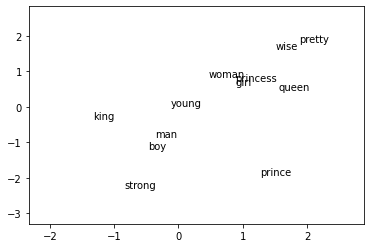

In [74]:
flg, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
  ax.annotate(word, (x1, x2))

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (9,9)

plt.show()